In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
 os.chdir("/content/drive/My Drive/Utils")

In [0]:
from torchvision import transforms
from helper import HelperModel
from dataset_info import DataSetInfo
from dataloader import DataLoader
from models.resnet import ResNet18
# import model as md
from transforms import Transform
from train import Train
from test import Test
from plot import Plot
from tqdm import tqdm

### Create model and display summary

In [10]:

model_obj = ResNet18(dropout=0.1)

device = HelperModel.get_device()

model = model_obj.to(device)

#create object for helper with object
helper_obj = HelperModel(model)

#display summaru of model
helper_obj.display_model_summay(model, (3, 32, 32))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### Get data set object

In [0]:
data_set_obj = DataSetInfo("cifa", "./data")

### Get the train test transforms 

In [0]:
customised_transforms =  [ transforms.RandomCrop(32, padding=4),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
custom_transfoms = Transform.get_transforms(customised_transforms)
transform_obj = Transform(mean=0.5, std=0.5, train_transforms = custom_transfoms,  test_transforms=custom_transfoms)
train_transforms = transform_obj.train_transforms
test_transforms = transform_obj.test_transforms

### Get Train and Test data set

In [13]:
train_set = data_set_obj.get_train_dataset(train_transforms)
test_set = data_set_obj.get_test_dataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


### Load the train and test data

In [14]:
data_loader_obj = DataLoader(train_set, test_set, batch_size=128)
train_loader = data_loader_obj.train_loader
test_loader = data_loader_obj.test_loader

CUDA Available? True


### Show some training images

plane dog deer deer truck cat truck truck cat cat plane horse plane dog dog deer car car frog car frog dog ship cat car frog deer bird deer bird cat horse car cat cat ship horse plane plane plane truck plane frog horse ship deer bird plane cat dog bird truck dog cat deer dog dog frog horse frog ship deer plane truck


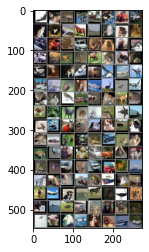

In [15]:
import torchvision
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
#get some random training images
iter_train_loader = iter(train_loader)
images, labels = iter_train_loader.next()
# show images
Plot.image_show(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%3s' % classes[labels[j]] for j in range(64)))

### Run the model

In [16]:
optimizer = helper_obj.get_l2_regularizer(weight_decay=0.0004, lr=0.001, momentum=0.95)
# optimizer = helper_obj.get_optimizer()
scheduler = helper_obj.get_one_cycle_lr(optimizer=optimizer, lr=0.001)
EPOCHS = 21
l1_factor=0.0001

train_obj = Train()
test_obj = Test()
train_max_acc = []
train_min_loss = []

criterion = nn.CrossEntropyLoss()

for epoch in range(1, EPOCHS):

    print("EPOCH:", epoch)
    train_obj.train(model, device, train_loader, optimizer, criterion)
    scheduler.step()
    test_obj.test(model, device, test_loader, criterion, misclassfied_required=True)

    train_max_acc.append(train_obj.train_acc[-1])
    train_min_loss.append(train_obj.train_losses[-1])

miscassified_images = test_obj.misclassified_images
test_losses = test_obj.test_losses
test_acc = test_obj.test_acc
print("Maximum Training Accuracy = ", max(train_max_acc))
print("Maximum Testing Accuracy = ", max(test_acc))




  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Train Set: Train Loss=1.3960630893707275 Batch_id=390 Accuracy=37.77: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 4433/10000 (44.33%)

EPOCH: 2


Train Set: Train Loss=1.0817573070526123 Batch_id=390 Accuracy=53.97: 100%|██████████| 391/391 [00:30<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 5692/10000 (56.92%)

EPOCH: 3


Train Set: Train Loss=0.7898508310317993 Batch_id=390 Accuracy=61.96: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6522/10000 (65.22%)

EPOCH: 4


Train Set: Train Loss=0.982613742351532 Batch_id=390 Accuracy=69.42: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7202/10000 (72.02%)

EPOCH: 5


Train Set: Train Loss=0.9488383531570435 Batch_id=390 Accuracy=74.35: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7498/10000 (74.98%)

EPOCH: 6


Train Set: Train Loss=0.545674204826355 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7449/10000 (74.49%)

EPOCH: 7


Train Set: Train Loss=0.6121335029602051 Batch_id=390 Accuracy=79.36: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7290/10000 (72.90%)

EPOCH: 8


Train Set: Train Loss=0.5026254057884216 Batch_id=390 Accuracy=81.21: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8019/10000 (80.19%)

EPOCH: 9


Train Set: Train Loss=0.4691324234008789 Batch_id=390 Accuracy=82.34: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8005/10000 (80.05%)

EPOCH: 10


Train Set: Train Loss=0.4974091649055481 Batch_id=390 Accuracy=83.43: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8123/10000 (81.23%)

EPOCH: 11


Train Set: Train Loss=0.45613163709640503 Batch_id=390 Accuracy=84.57: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8205/10000 (82.05%)

EPOCH: 12


Train Set: Train Loss=0.446461021900177 Batch_id=390 Accuracy=85.13: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7455/10000 (74.55%)

EPOCH: 13


Train Set: Train Loss=0.4816661775112152 Batch_id=390 Accuracy=86.12: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8301/10000 (83.01%)

EPOCH: 14


Train Set: Train Loss=0.32954102754592896 Batch_id=390 Accuracy=87.17: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8338/10000 (83.38%)

EPOCH: 15


Train Set: Train Loss=0.37123921513557434 Batch_id=390 Accuracy=88.48: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8466/10000 (84.66%)

EPOCH: 16


Train Set: Train Loss=0.32960110902786255 Batch_id=390 Accuracy=89.81: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8539/10000 (85.39%)

EPOCH: 17


Train Set: Train Loss=0.1565280556678772 Batch_id=390 Accuracy=91.34: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8781/10000 (87.81%)

EPOCH: 18


Train Set: Train Loss=0.10065864026546478 Batch_id=390 Accuracy=92.83: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8923/10000 (89.23%)

EPOCH: 19


Train Set: Train Loss=0.16808776557445526 Batch_id=390 Accuracy=93.91: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9004/10000 (90.04%)

EPOCH: 20


Train Set: Train Loss=0.242533877491951 Batch_id=390 Accuracy=94.23: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]



Test set: Average loss: 0.0023, Accuracy: 9033/10000 (90.33%)

Maximum Training Accuracy =  94.23
Maximum Testing Accuracy =  90.33


### Display graphs

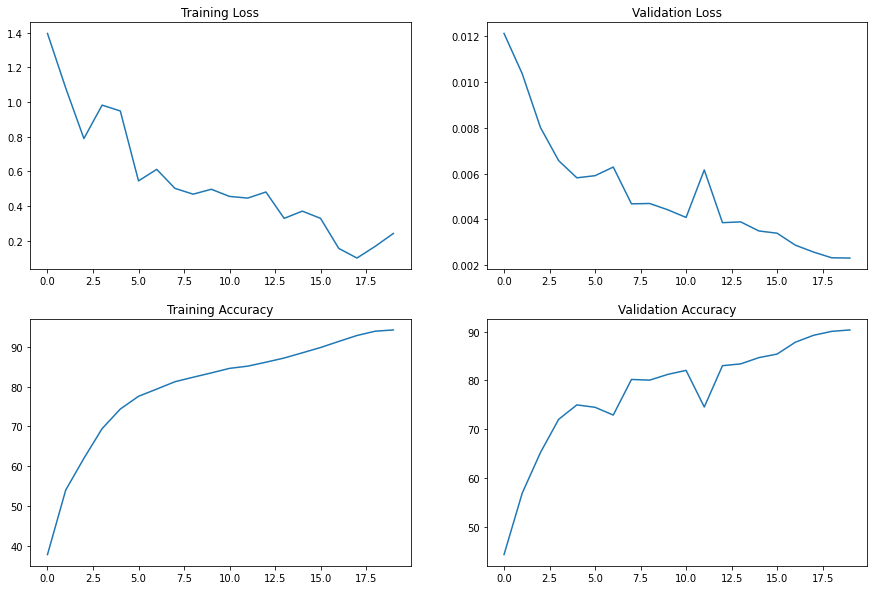

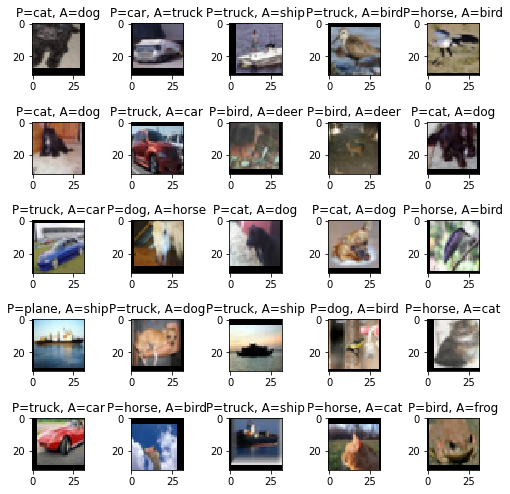

In [17]:
plt_obj = Plot(train_max_acc, train_min_loss, test_acc, test_losses)
# Plot all graph
plt_obj.display_all_plot()
# # plot train accuracy graph
# plt_obj.plot_train_graph()
# #plot train loss graph
# plt_obj.plot_train_graph(plot_case="Loss")
# #plot validation accuracy graph
# plt_obj.plot_validation_graph()
# #plot validation loss graph
# plt_obj.plot_validation_graph(plot_case="Loss")
# # plot 25 misclassified images
plt_obj.plot_cifar_misclassified(miscassified_images)